In [37]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
#warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] 
matplotlib.rcParams['xtick.labelsize'] 
matplotlib.rcParams['ytick.labelsize'] 
matplotlib.rcParams['text.color'] = 'k'

In [38]:
path_to_data = 'https://raw.githubusercontent.com/bashirmohd/DataSceince/master/Time-series-prediction_production/lond_newy_in.csv'

In [39]:
df = pd.read_csv(path_to_data)

In [40]:
df.head()

,Days,Speed
0,16/10/2018 00:00,441.026750
1,16/10/2018 01:00,460.608150
2,16/10/2018 02:00,406.037214
3,16/10/2018 03:00,445.741674
4,16/10/2018 04:00,357.538164


In [41]:
df.tail()

,Days,Speed
2155,13/01/2019 19:00,97.151573
2156,13/01/2019 20:00,81.116056
2157,13/01/2019 21:00,89.724965
2158,13/01/2019 22:00,90.066610
2159,13/01/2019 23:00,92.342601


In [42]:
df.isnull().sum()
df.dtypes

Days      object
Speed    float64
dtype: object

Text(0.5,1,'Lond_newy_in Link Speed Over Time In Hours')

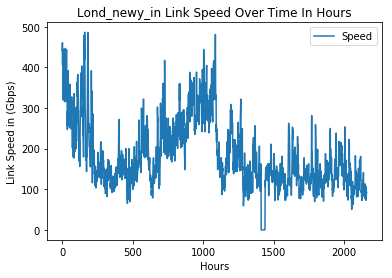

In [43]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Link Speed in (Gbps)')
plt.title('Lond_newy_in Link Speed Over Time In Hours')

In [44]:
df['Days'] =  pd.to_datetime(df['Days'], infer_datetime_format=True)

In [45]:
df = df.set_index('Days')

In [46]:
average_daily_speed = df.resample('D').mean()

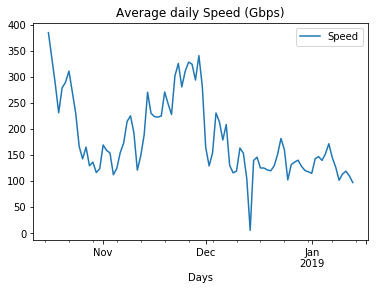

In [47]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

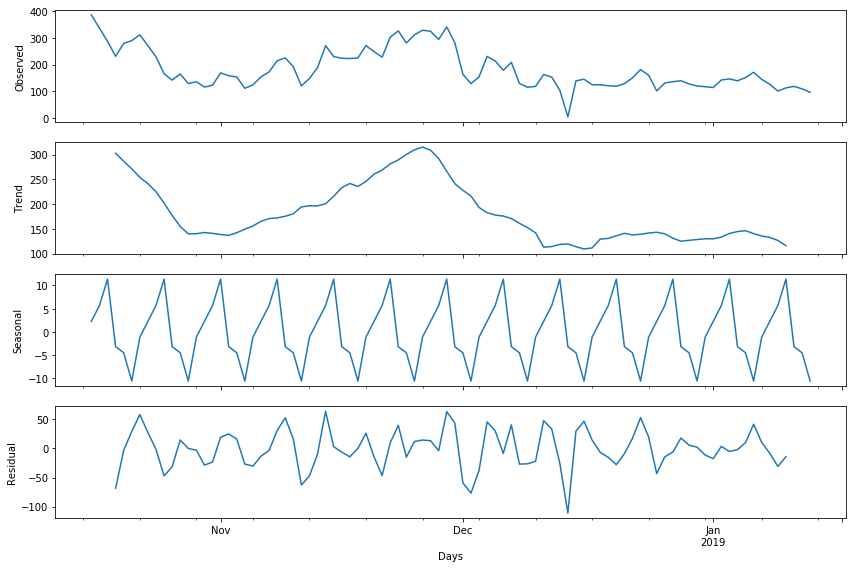

In [48]:
# Seaconal Decomposition of the Network Trace Data
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(average_daily_speed, model='additive')
fig = decomposition.plot()
plt.show()

In [49]:
# Define the p, d and q parameters to take any value between 0 and 2
# Generate all different combinations of p, q and q triplets
# Generate all different combinations of seasonal p, q and q triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [50]:
print('Possible Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Possible Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [51]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [52]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1192.2228570088082
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:967.5636506326355
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:918.6579265519695
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:753.4863696049882
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:921.6907313166205
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:884.5779552949534
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:775.2229343421404
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:755.2297125504715
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1080.4905199512218
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:891.8780666684551
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:853.7780773035972
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:700.8705155953431
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:868.8641416234026
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:821.7349084344759
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:734.4954999587288
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:702.8103386872674
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:897.1558918024145
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:775.4641656040408
ARIMA(0,

In [35]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:662.0498135423582

In [36]:
mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6367      0.104     -6.149      0.000      -0.840      -0.434
ma.S.L12      -0.7065      0.253     -2.790      0.005      -1.203      -0.210
sigma2      1.273e+05   2.06e+04      6.194      0.000     8.7e+04    1.68e+05
